# **Experiment 2**

1.   Using Deeply Connected Neural Network
2.   Using Convolutional Neural Network




Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/ML: Siren Detector")

Import Libraries

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

Load Metadata

In [ ]:
df = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

Load Target vector

In [ ]:
labels = np.load('UrbanSound8K/target.npy')
labels.shape

(8732, 10)

In [ ]:
labels = np.load('UrbanSound8K/target_aug.npy')
labels.shape

(34928, 10)

Load Features vector

In [ ]:
features = np.load('UrbanSound8K/features.npy')
features.shape

(8732, 128)

In [ ]:
features = np.load('UrbanSound8K/features_aug.npy')
features.shape

(34928, 128)

Train, validation and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=0,stratify=labels)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(27942, 128) (6986, 128)
(27942, 10) (6986, 10)


## **Fully Connected Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation,Flatten, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Dense(400,input_shape=(128,)))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(200))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(100))
model.add(Activation('tanh'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               51600     
_________________________________________________________________
activation (Activation)      (None, 400)               0         
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               120300    
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               6

Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

Add checkpoint and train the model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', 
                  mode='max', verbose=1, 
                  patience=70)
checkpoint = ModelCheckpoint(filepath='my_model/classification.hdf5', 
                             monitor = 'val_accuracy',
                             verbose=1, 
                             save_best_only=True)

history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[es, checkpoint])

Epoch 1/1000
219/219 [==============================] - 15s 6ms/step - loss: 2.1032 - accuracy: 0.2509 - val_loss: 1.6078 - val_accuracy: 0.4333

Epoch 00001: val_accuracy improved from -inf to 0.43331, saving model to my_model/classification.hdf5
Epoch 2/1000
219/219 [==============================] - 1s 3ms/step - loss: 1.6295 - accuracy: 0.4300 - val_loss: 1.4781 - val_accuracy: 0.4946

Epoch 00002: val_accuracy improved from 0.43331 to 0.49456, saving model to my_model/classification.hdf5
Epoch 3/1000
219/219 [==============================] - 1s 3ms/step - loss: 1.4952 - accuracy: 0.4884 - val_loss: 1.3384 - val_accuracy: 0.5541

Epoch 00003: val_accuracy improved from 0.49456 to 0.55409, saving model to my_model/classification.hdf5
Epoch 4/1000
219/219 [==============================] - 1s 4ms/step - loss: 1.3333 - accuracy: 0.5572 - val_loss: 1.2172 - val_accuracy: 0.6068

Epoch 00004: val_accuracy improved from 0.55409 to 0.60675, saving model to my_model/classification.hdf5
Ep

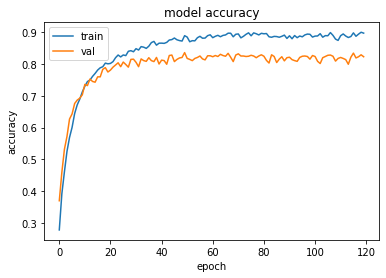

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

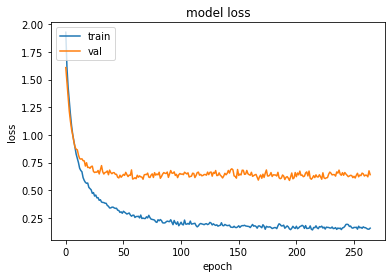

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Evaluate accuracy

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
y_true = np.argmax(y_test, axis = 1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       200
           1       0.92      0.77      0.84        86
           2       0.72      0.71      0.72       200
           3       0.72      0.79      0.75       200
           4       0.88      0.89      0.88       200
           5       0.90      0.95      0.93       200
           6       0.88      0.84      0.86        75
           7       0.91      0.96      0.94       200
           8       0.88      0.88      0.88       186
           9       0.87      0.78      0.82       200

    accuracy                           0.85      1747
   macro avg       0.86      0.84      0.85      1747
weighted avg       0.85      0.85      0.85      1747



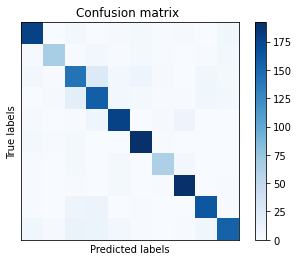

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## **AUGMENTED DATASET**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', 
                  mode='max', verbose=1, 
                  patience=70)
checkpoint = ModelCheckpoint(filepath='my_model/classification_aug.hdf5', 
                             monitor = 'val_accuracy',
                             verbose=1, 
                             save_best_only=True)

history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[es, checkpoint])

Epoch 1/1000
874/874 [==============================] - 18s 4ms/step - loss: 1.8241 - accuracy: 0.3655 - val_loss: 1.1565 - val_accuracy: 0.6098

Epoch 00001: val_accuracy improved from -inf to 0.60979, saving model to my_model/classification_aug.hdf5
Epoch 2/1000
874/874 [==============================] - 3s 3ms/step - loss: 1.1589 - accuracy: 0.6134 - val_loss: 0.8914 - val_accuracy: 0.7048

Epoch 00002: val_accuracy improved from 0.60979 to 0.70484, saving model to my_model/classification_aug.hdf5
Epoch 3/1000
874/874 [==============================] - 3s 4ms/step - loss: 0.9217 - accuracy: 0.6957 - val_loss: 0.7144 - val_accuracy: 0.7611

Epoch 00003: val_accuracy improved from 0.70484 to 0.76109, saving model to my_model/classification_aug.hdf5
Epoch 4/1000
874/874 [==============================] - 3s 4ms/step - loss: 0.7372 - accuracy: 0.7609 - val_loss: 0.6127 - val_accuracy: 0.7999

Epoch 00004: val_accuracy improved from 0.76109 to 0.79989, saving model to my_model/classifica

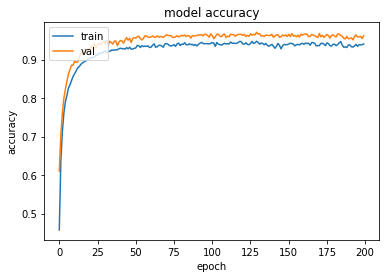

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

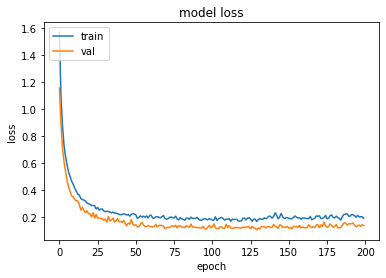

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
y_true = np.argmax(y_test, axis = 1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       800
           1       0.99      0.95      0.97       343
           2       0.94      0.92      0.93       800
           3       0.97      0.93      0.95       800
           4       0.97      0.96      0.97       800
           5       0.94      0.99      0.96       800
           6       0.97      0.97      0.97       299
           7       0.98      0.97      0.97       800
           8       0.95      0.98      0.97       744
           9       0.96      0.96      0.96       800

    accuracy                           0.96      6986
   macro avg       0.96      0.96      0.96      6986
weighted avg       0.96      0.96      0.96      6986



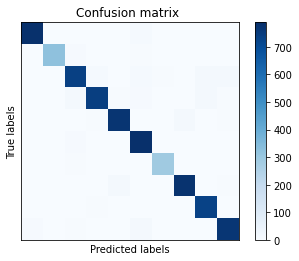

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## **Convolutional Neural Network**

Reshape the feature vectors

In [ ]:
X_train = X_train.reshape(len(X_train), 32, 4, 1)
X_test = X_test.reshape(len(X_test), 32, 4, 1)
print(X_train.shape, X_test.shape)

(27942, 32, 4, 1) (6986, 32, 4, 1)


Define model

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = (32, 4, 1)))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(0.1))
model_2.add(Flatten())
model_2.add(Dense(1024, activation ="tanh"))
model_2.add(Dense(10, activation = "softmax"))

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 4, 64)         640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 2, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 2, 128)        73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 1, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)             

Compile the model

In [ ]:
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Add checkpoint and train the model

In [ ]:
es = EarlyStopping(monitor='val_accuracy', 
                  mode='max', verbose=1, 
                  patience=70)
checkpoint = ModelCheckpoint(filepath='my_model/classification_2.hdf5', 
                             monitor = 'val_accuracy',
                             verbose=1, 
                             save_best_only=True)

history_2 = model_2.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[es, checkpoint])

Epoch 1/1000
219/219 [==============================] - 31s 6ms/step - loss: 1.6632 - accuracy: 0.4360 - val_loss: 1.2344 - val_accuracy: 0.5793

Epoch 00001: val_accuracy improved from -inf to 0.57928, saving model to my_model/classification_2.hdf5
Epoch 2/1000
219/219 [==============================] - 1s 4ms/step - loss: 1.1370 - accuracy: 0.6241 - val_loss: 1.1796 - val_accuracy: 0.6182

Epoch 00002: val_accuracy improved from 0.57928 to 0.61820, saving model to my_model/classification_2.hdf5
Epoch 3/1000
219/219 [==============================] - 1s 4ms/step - loss: 0.9123 - accuracy: 0.6992 - val_loss: 1.0818 - val_accuracy: 0.6789

Epoch 00003: val_accuracy improved from 0.61820 to 0.67888, saving model to my_model/classification_2.hdf5
Epoch 4/1000
219/219 [==============================] - 1s 4ms/step - loss: 0.8246 - accuracy: 0.7245 - val_loss: 1.0086 - val_accuracy: 0.6846

Epoch 00004: val_accuracy improved from 0.67888 to 0.68460, saving model to my_model/classification_2

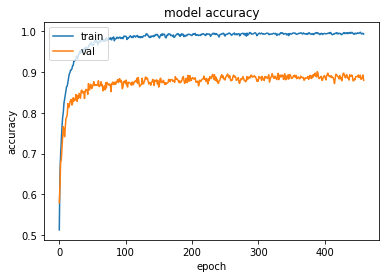

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

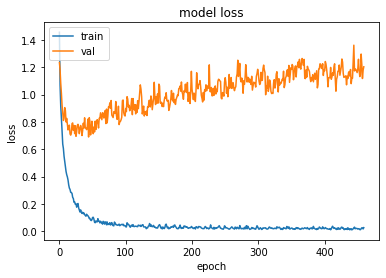

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Evaluate the accuracy

In [ ]:
predictions = model_2.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
y_true = np.argmax(y_test, axis = 1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       200
           1       0.88      0.92      0.90        86
           2       0.80      0.72      0.76       200
           3       0.86      0.81      0.84       200
           4       0.88      0.91      0.89       200
           5       0.92      0.96      0.94       200
           6       0.87      0.91      0.89        75
           7       0.93      0.94      0.93       200
           8       0.96      0.92      0.94       186
           9       0.82      0.81      0.82       200

    accuracy                           0.88      1747
   macro avg       0.88      0.88      0.88      1747
weighted avg       0.88      0.88      0.88      1747



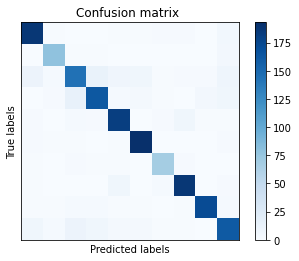

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## **AUGMENTED DATASET**

In [ ]:
es = EarlyStopping(monitor='val_accuracy', 
                  mode='max', verbose=1, 
                  patience=70)
checkpoint = ModelCheckpoint(filepath='my_model/classification_aug_2.hdf5', 
                             monitor = 'val_accuracy',
                             verbose=1, 
                             save_best_only=True)

history_2 = model_2.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[es, checkpoint])

Epoch 1/1000
874/874 [==============================] - 34s 4ms/step - loss: 1.3927 - accuracy: 0.5254 - val_loss: 0.8415 - val_accuracy: 0.7322

Epoch 00001: val_accuracy improved from -inf to 0.73218, saving model to my_model/classification_aug_2.hdf5
Epoch 2/1000
874/874 [==============================] - 3s 4ms/step - loss: 0.7934 - accuracy: 0.7435 - val_loss: 0.6565 - val_accuracy: 0.7854

Epoch 00002: val_accuracy improved from 0.73218 to 0.78543, saving model to my_model/classification_aug_2.hdf5
Epoch 3/1000
874/874 [==============================] - 3s 4ms/step - loss: 0.6133 - accuracy: 0.7990 - val_loss: 0.5105 - val_accuracy: 0.8375

Epoch 00003: val_accuracy improved from 0.78543 to 0.83753, saving model to my_model/classification_aug_2.hdf5
Epoch 4/1000
874/874 [==============================] - 3s 4ms/step - loss: 0.4823 - accuracy: 0.8418 - val_loss: 0.4356 - val_accuracy: 0.8534

Epoch 00004: val_accuracy improved from 0.83753 to 0.85342, saving model to my_model/clas

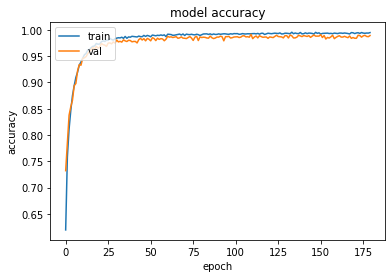

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

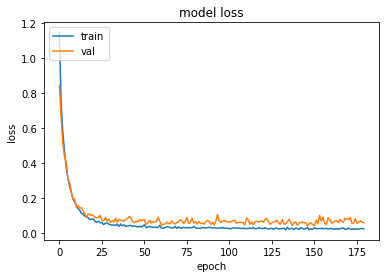

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predictions = model_2.predict(X_test)
y_pred = np.argmax(predictions, axis = 1)
y_true = np.argmax(y_test, axis = 1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       800
           1       1.00      0.99      0.99       343
           2       0.98      0.97      0.98       800
           3       0.99      0.99      0.99       800
           4       0.99      0.98      0.99       800
           5       0.99      0.99      0.99       800
           6       1.00      0.99      0.99       299
           7       0.98      0.99      0.98       800
           8       0.99      1.00      0.99       744
           9       0.99      0.99      0.99       800

    accuracy                           0.99      6986
   macro avg       0.99      0.99      0.99      6986
weighted avg       0.99      0.99      0.99      6986



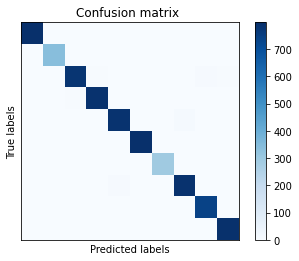

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()